In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
data = pd.read_csv(r"C:\Users\Shinemet\Ironhack\Labs\Module3\3. Data-Cleaning-Challenge\iris-data.csv")

In [3]:
# viewing dataset first rows
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# checking data types and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# checking overall statistics of the dataset to find outliers
data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# 5 missing values visible in column 3, column 4 is categorical
data.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [7]:
# extracting the missing values
mv = data[data.isna().any(axis=1)]
mv

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [8]:
# replace missing values with linear interpolation
mv_filled = data.interpolate(inplace=False)
mv_filled.iloc[7:12]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.266667,Iris-setosa
8,4.4,2.9,1.4,0.233333,Iris-setosa
9,4.9,3.1,1.5,0.200000,Iris-setosa
10,5.4,3.7,1.5,0.166667,Iris-setosa
11,4.8,3.4,1.6,0.133333,Iris-setosa


In [9]:
# interpolate on the full dataset and check missing values
data.interpolate(inplace=True)
data.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [10]:
# checking misspellings in categorical column
data['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [11]:
# replacing misspellings
data['class'].mask(data['class']=='versicolor', 'Iris-versicolor', inplace=True)
data['class'].mask(data['class']=='Iris-setossa', 'Iris-setosa', inplace=True)
data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [12]:
# checking duplicates
data.duplicated().any()

True

In [13]:
# 2 rows will be dropped
data.drop_duplicates()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


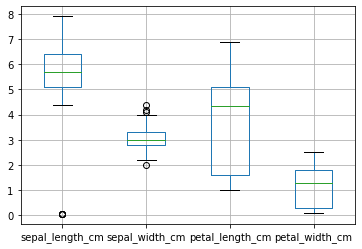

In [14]:
# Compute whisker's plot to visualize dataset distribution
data.boxplot()
plt.show()

In [15]:
# Find the rows with outliers
data[data['sepal_length_cm']==data['sepal_length_cm'].min()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [16]:
# drop 2 outliers in column 0 and run outlier function until there is no outlier left:
# data.drop(data['sepal_length_cm'].idxmin(), inplace=True) would have to be computed twice, let's drop by index
data.drop([77, 78, 79, 80, 81], inplace=True)

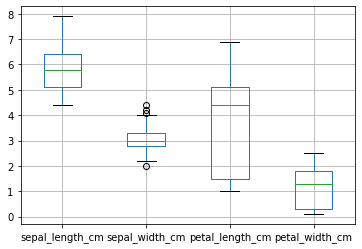

In [17]:
# plotting boxplot again
data.boxplot()
plt.show()

In [18]:
# compute statistics on the clean dataset
data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,145.000000,145.000000,145.000000,145.000000
mean,5.837241,3.068276,3.746897,1.200000
std,0.813936,0.431680,1.790564,0.776706
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
data

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
data.to_csv(r'C:\Users\Shinemet\Ironhack\Labs\Module3\6. PCA\iris-data_clean.csv')

# Train-test split

In [21]:
# import libraries
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [22]:
# Split the dataset into independent features (X) and target (y)
x = data[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']]
y = data['class']

print(x.shape)
print(y.shape)

(145, 4)
(145,)


In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=5)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(87, 4)
(87,)
(58, 4)
(58,)


In [24]:
# Split the dataset with Kfold
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold()
skf.get_n_splits(x, y)
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [25]:
for train_index, test_index in skf.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    print(test_index.shape)

TRAIN: [ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144] TEST: [  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  95  96  97  98  99 100 101 102 103 104]
(29,)
TRAIN: [  0   1   2   3   4   5   6   7   8   9  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 115 116 117 118
 119 120 121 122 1

------------- 1 -------------------
[[19  0  0]
 [ 0 20  2]
 [ 0  2 15]]
------------- 2 -------------------
[[19  0  0]
 [ 0 20  2]
 [ 0  6 11]]
------------- 3 -------------------
[[19  0  0]
 [ 0 20  2]
 [ 0  1 16]]
------------- 4 -------------------
[[19  0  0]
 [ 0 21  1]
 [ 0  1 16]]
------------- 5 -------------------
[[19  0  0]
 [ 0 20  2]
 [ 0  1 16]]
------------- 6 -------------------
[[19  0  0]
 [ 0 22  0]
 [ 0  1 16]]
------------- 7 -------------------
[[19  0  0]
 [ 0 21  1]
 [ 0  1 16]]
------------- 8 -------------------
[[19  0  0]
 [ 0 21  1]
 [ 0  1 16]]
------------- 9 -------------------
[[19  0  0]
 [ 0 20  2]
 [ 0  1 16]]
------------- 10 -------------------
[[19  0  0]
 [ 0 21  1]
 [ 0  1 16]]
------------- 11 -------------------
[[19  0  0]
 [ 0 20  2]
 [ 0  0 17]]
------------- 12 -------------------
[[19  0  0]
 [ 0 21  1]
 [ 0  0 17]]
------------- 13 -------------------
[[19  0  0]
 [ 0 20  2]
 [ 0  0 17]]
------------- 14 -------------------
[[19  0  0

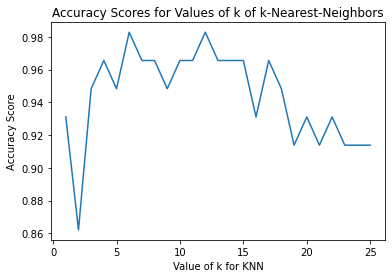

In [26]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    print ('-------------', k, '-------------------')
    print(metrics.confusion_matrix(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

### Decision Tree

In [27]:
tree = DecisionTreeClassifier(max_depth = 3, random_state = 1)
tree.fit(x_train,y_train)
prediction=tree.predict(x_test)
print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.914


*This decision tree predicts 93.3% of the test data correctly. the importance of each predictor can be seen through its feature_importances_ attribute*

In [28]:
tree.feature_importances_

array([0.        , 0.        , 0.46040971, 0.53959029])

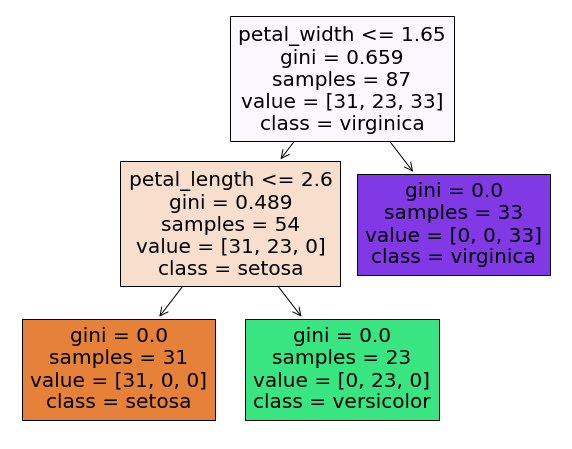

In [29]:
plt.figure(figsize = (10,8))
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']
plot_tree(tree, feature_names = fn, class_names = cn, filled = True);

C:\Users\Shinemet\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


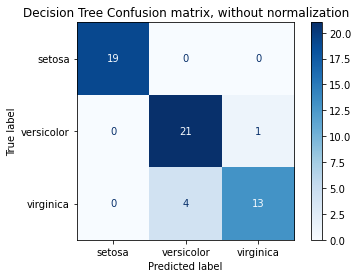

In [30]:
cm = metrics.plot_confusion_matrix(tree, x_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
cm.ax_.set_title('Decision Tree Confusion matrix, without normalization');

In [31]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 

The accuracy for Radius Neighbors Classifier is: 82.75862068965517 %

The classification report for Radius Neighbors Classifier is:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.55      0.71        22
 Iris-virginica       0.63      1.00      0.77        17

       accuracy                           0.83        58
      macro avg       0.88      0.85      0.83        58
   weighted avg       0.89      0.83      0.82        58



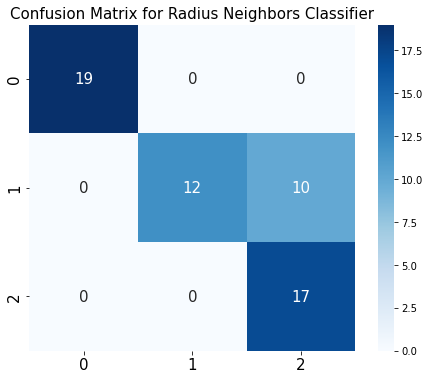

In [32]:
from sklearn.neighbors import RadiusNeighborsClassifier
rnc = RadiusNeighborsClassifier(2)
rnc.fit(x_train, y_train)
y_pred = rnc.predict(x_test)
acc_rnc = rnc.score(x_test, y_test)
print('The accuracy for Radius Neighbors Classifier is:', acc_rnc * 100, "%")
generate_results(rnc, y_pred, 'Radius Neighbors Classifier')

The accuracy of the Random Forest Classifier is: 91.37931034482759 %

The classification report for Random Forest Classifier is:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.84      0.95      0.89        22
 Iris-virginica       0.93      0.76      0.84        17

       accuracy                           0.91        58
      macro avg       0.92      0.91      0.91        58
   weighted avg       0.92      0.91      0.91        58



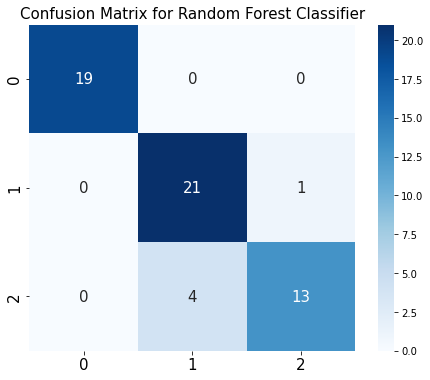

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(3)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')

In [34]:
x_train.shape

(87, 4)

In [35]:
x_test.shape

(58, 4)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [38]:
y_pred = lr.predict(x_test)
# Predict probabilities
probs_y=lr.predict_proba(x_test)
### Print results 
probs_y = np.round(probs_y, 2)

The accuracy of the Logistic Regression is: 93.10344827586206 %

The classification report for Logistic Regression is:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.88      0.95      0.91        22
 Iris-virginica       0.93      0.82      0.87        17

       accuracy                           0.93        58
      macro avg       0.94      0.93      0.93        58
   weighted avg       0.93      0.93      0.93        58



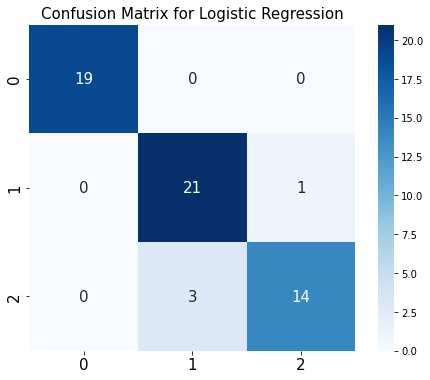

In [39]:
print('The accuracy of the Logistic Regression is:', lr.score(x_test, y_test) * 100, '%')
generate_results(lr, y_pred, 'Logistic Regression')